#### 8. This exercise relates to the `College` data set, which can be found in the file `College.csv` on the book website. It contains a number of variables for 777 different universities and colleges in the US. The variables are
* `Private` : Public/private indicator
* `Apps` : Number of applications received
* `Accept` : Number of applicants accepted
* `Enroll` : Number of new students enrolled
* `Top10perc` : New students from top 10 % of high school class
* `Top25perc` : New students from top 25 % of high school class
* `F.Undergrad` : Number of full-time undergraduates
* `P.Undergrad` : Number of part-time undergraduates
* `Outstate` : Out-of-state tuition
* `Room.Board` : Room and board costs
* `Books` : Estimated book costs
* `Personal` : Estimated personal spending
* `PhD` : Percent of faculty with Ph.D.s
* `Terminal` : Percent of faculty with terminal degree
* `S.F.Ratio` : Student/faculty ratio
* `perc.alumni` : Percent of alumni who donate
* `Expend` : Instructional expenditure per student
* `Grad.Rate` : Graduation rate
Before reading the data into Python, it can be viewed in Excel or a text editor.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [1]:
college: pd.DataFrame = pd.read_csv("../../data/College.csv")
college2: pd.DataFrame = pd.read_csv('../../data/College.csv', index_col=0)
college3: pd.DataFrame = college.rename({'Unnamed: 0': 'College'},axis=1)
college3: pd.DataFrame = college3.set_index('College')
college = college3

In [2]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


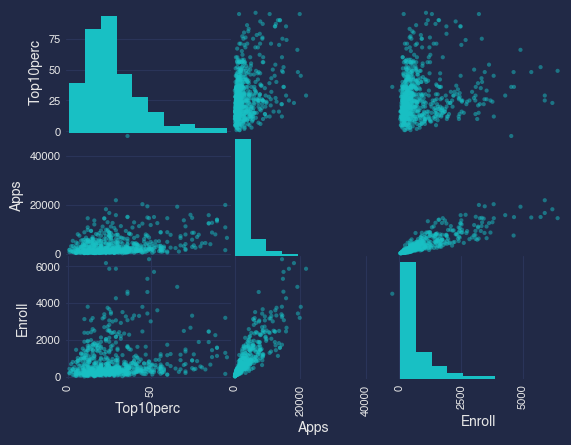

In [3]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]]);

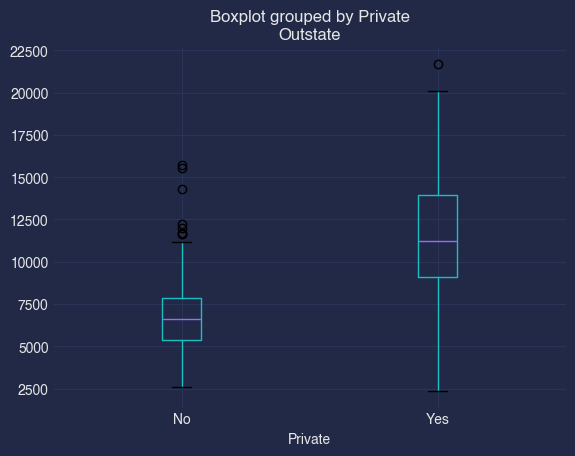

In [4]:
college.boxplot(column='Outstate', by='Private');

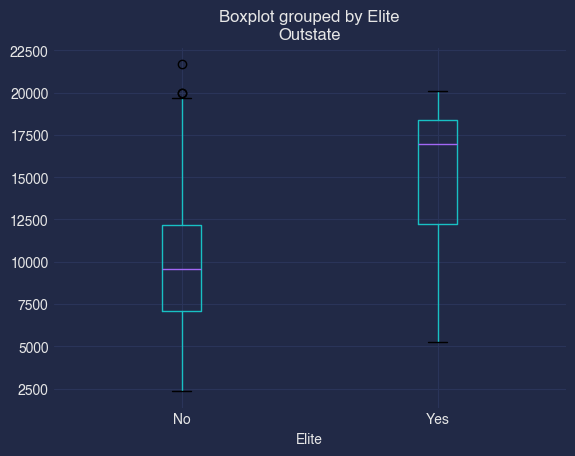

In [5]:
college["Elite"] = pd.cut(college["Top10perc"], [0, 50, 100], labels=["No", "Yes"])
college.Elite.value_counts()
college.boxplot(column='Outstate', by='Elite');

<Axes: ylabel='Frequency'>

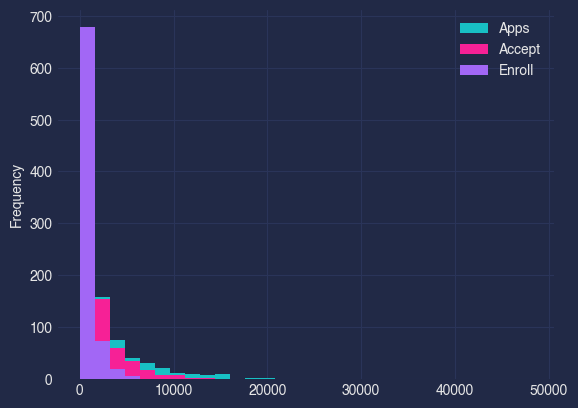

In [6]:
college[["Apps", "Accept", "Enroll"]].plot.hist(bins = 30)

% of Elite Colleges: 10.04%.
% of Elite Colleges that are Private: 83.33%.
% of Private Colleges that are Elite: 11.50%.
Correlation between Elite and Private: 0.08


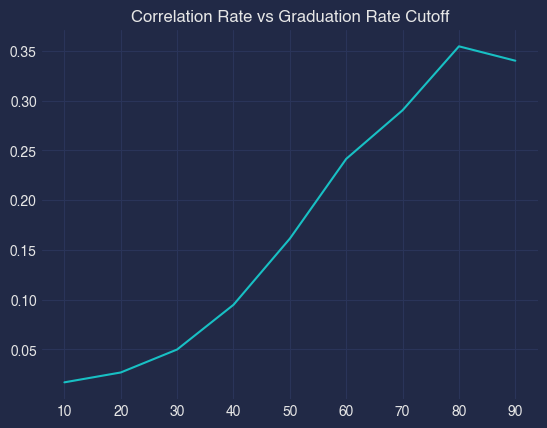

In [7]:
import numpy as np
import matplotlib.pyplot as plt

pct_elite = college["Elite"].value_counts()["Yes"] / len(college)

print(f"% of Elite Colleges: {pct_elite*100:.2f}%.")

pct_private_if_elite = college[college.Elite == "Yes"].Private.value_counts(normalize=True)["Yes"]
pct_elite_if_private = college[college.Private == "Yes"].Elite.value_counts(normalize=True)["Yes"]
print(f"% of Elite Colleges that are Private: {pct_private_if_elite*100:.2f}%.")
print(f"% of Private Colleges that are Elite: {pct_elite_if_private*100:.2f}%.")

elite_private_correlation = (college["Elite"] == "Yes").corr(college["Private"] == "Yes")
print(f"Correlation between Elite and Private: {elite_private_correlation:.2f}")

correlations = []
g_rates = np.arange(10, 100, 10)
for g_rate in g_rates:
    _c = pd.cut(college["Grad.Rate"], [0, g_rate, 100], labels = ["No", "Yes"], duplicates="drop")
    correlations.append((_c == "Yes").corr((college.Elite == "Yes")))

plt.title("Correlation Rate vs Graduation Rate Cutoff")
plt.plot(g_rates, correlations);

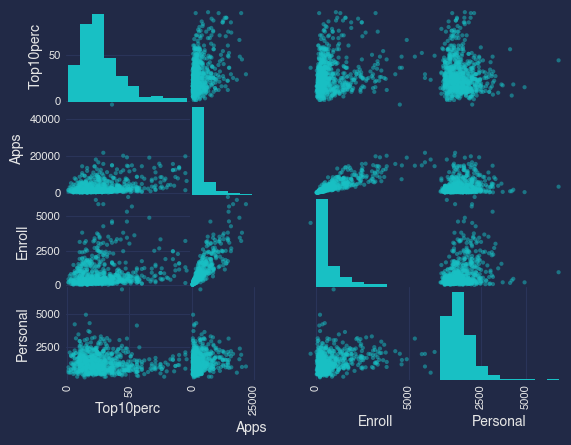

In [8]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll", "Personal"]]);

In [9]:
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,No
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,No
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,No
